<a href="https://colab.research.google.com/github/Nourelimanehed/ml_notebooks/blob/main/Chirper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naïve Bayes Classifier

## Import the necessary libraires

In [1]:
# A module for handling data
import pandas as pd
# A module that helps finding all pathnames that match a certain pattern
import glob

# A class that will be used to count the number of times a word has occurred in a text
from sklearn.feature_extraction.text import CountVectorizer

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The multinomial type of the Naive Bayes classfier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Python's plotting module.
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# The Python package for scientific computing
import numpy as np

## Read the data

In [5]:
data = pd.read_csv('chirper.csv', encoding = "ISO-8859-1").drop(['User','IDS'	,'Date','Flag'], axis =1)
data.head()

,Target,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
data['Target'].value_counts()

Target
1    9500
0     500
Name: count, dtype: int64

## Define the inputs and the target

Identify the **relevant** columns and declare the variables below.

In [7]:
inputs = data['Text']
target = data['Target']

## Split the data into training and tesitng

* Perform a 70:30 split - 30% of the data should be dedicated to testing.
* Set the random state to 365.
* Make sure that there is a fair distribution of the representatives from each class.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.3,
                                                    random_state=365,
                                                    stratify = target)

## Transform the training and testing inputs using CountVectorizer

In [9]:
# Create an instance of the vectorizer class.
vectorizer = CountVectorizer()
# Apply the fit_transform() method on the training data and the transform() method on the test data.
# Note that we split the data *before* applying the 'fit_tranform()' method!
# The 'fit_transform()' method is to be applied *only* on the training data!
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [10]:
# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB()
# Fit the model to the training data
clf.fit(x_train_transf, y_train)

MultinomialNB()

## Make predictions on the test data

In [11]:
# Predict the target of the observations in the test set
y_test_pred = clf.predict(x_test_transf)

## Create a confusion matrix

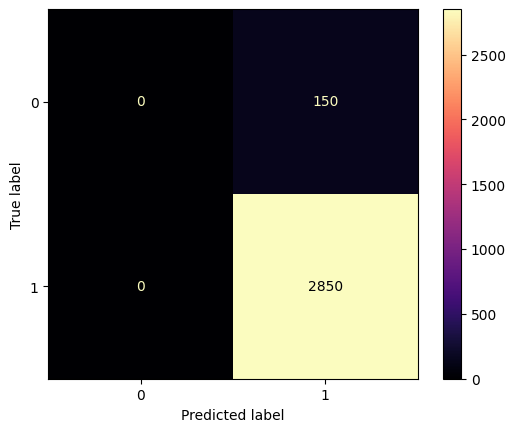

In [12]:
# Drop the seaborn style, so that we remove the white lines passing throguh the numbers
sns.reset_orig()

# Create the confusion matrix by providing the true and the predicted values as arguments.
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

## Print a classification report

* Fill in the parameters necessary for the classification_report() method.
* A parameter **zero_division** has been also added and set to 0.

In [13]:
print("Unique values in y_test:", sorted(set(y_test)))
print("Unique values in y_test_pred:", sorted(set(y_test_pred)))


Unique values in y_test: [0, 1]
Unique values in y_test_pred: [1]


In [14]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['Caws', 'Chrips'], zero_division = 0))

              precision    recall  f1-score   support

        Caws       0.00      0.00      0.00       150
      Chrips       0.95      1.00      0.97      2850

    accuracy                           0.95      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.90      0.95      0.93      3000



In [15]:
clf1 = ComplementNB()
clf1.fit(x_train_transf, y_train)
clf1.get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'norm': False}

In [16]:
# Predict the target of the observations in the test set
y_test_pred = clf1.predict(x_test_transf)

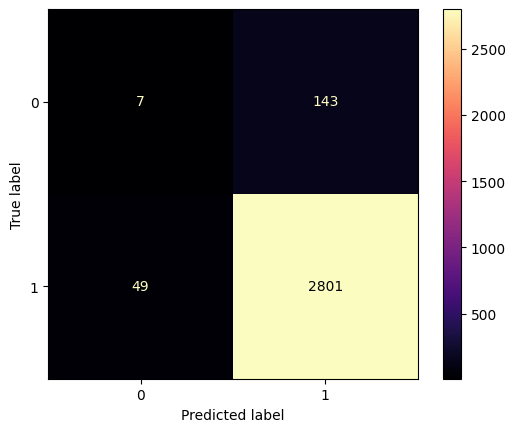

In [17]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [18]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['Caws', 'Chrips'], zero_division = 0))

              precision    recall  f1-score   support

        Caws       0.12      0.05      0.07       150
      Chrips       0.95      0.98      0.97      2850

    accuracy                           0.94      3000
   macro avg       0.54      0.51      0.52      3000
weighted avg       0.91      0.94      0.92      3000

